In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [8]:
# Загрузка данных
data = pd.read_csv('HousingData.csv')

In [11]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
# Заполнение пропущенных значений медианными значениями
imputer = SimpleImputer(strategy='median')
data_imputed = imputer.fit_transform(data)
data_imputed = pd.DataFrame(data_imputed, columns=data.columns)

# Разделение данных на признаки и целевую переменную
X = data_imputed.drop('MEDV', axis=1)
y = data_imputed['MEDV']

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Создание модели нейронной сети
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

# Компиляция модели
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Обучение модели
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

# Оценка модели
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print(f'Test MAE: {test_mae}')


Epoch 1/100


/Users/artemefimov/miniconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 608.8023 - mae: 22.8957 - val_loss: 546.0173 - val_mae: 21.8900
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 555.4227 - mae: 21.9812 - val_loss: 518.7164 - val_mae: 21.2688
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 537.4778 - mae: 21.3613 - val_loss: 488.0663 - val_mae: 20.5600
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 559.8826 - mae: 21.5966 - val_loss: 449.7531 - val_mae: 19.6429
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 482.8564 - mae: 20.0488 - val_loss: 401.0419 - val_mae: 18.4031
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 473.6711 - mae: 19.5147 - val_loss: 340.0606 - val_mae: 16.7327
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 354.0752 - mae: 16.8291 - val_loss: 269.9545 - val_mae: 14.6715
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 289.6961 - mae: 14.6765 - val_loss: 195.7729 - val_mae: 12.1512
Epoch 9/100
11/11 ━━━━━━━━━━

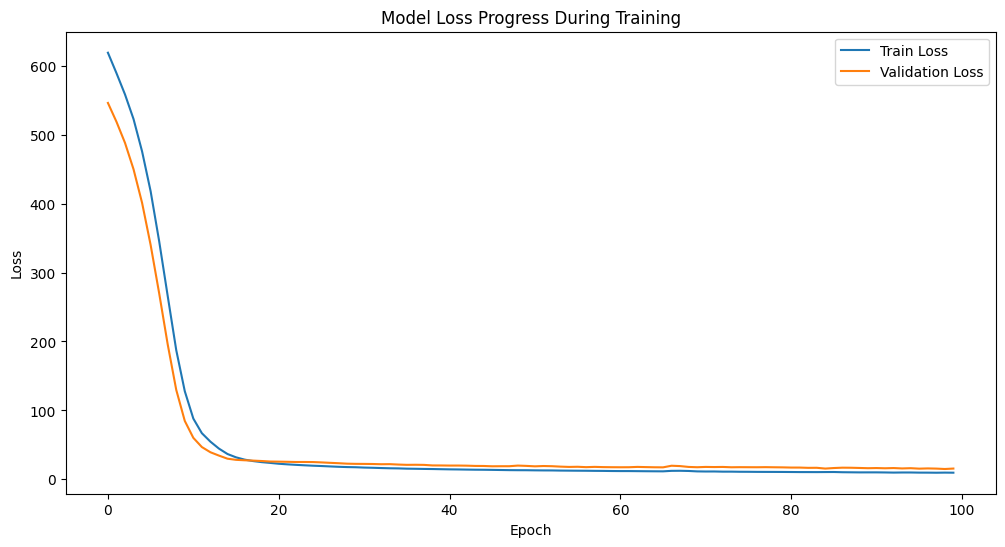

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x15a6c5440> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


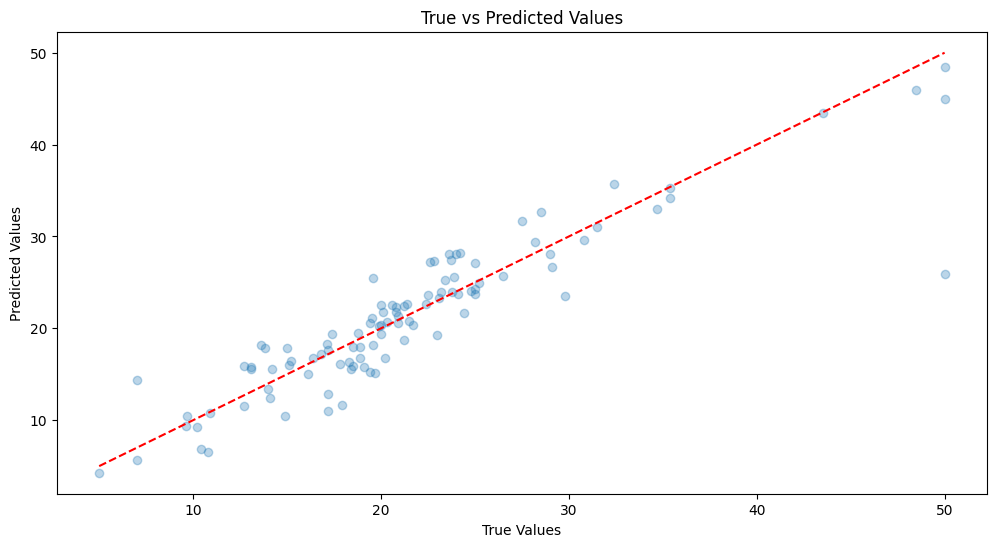

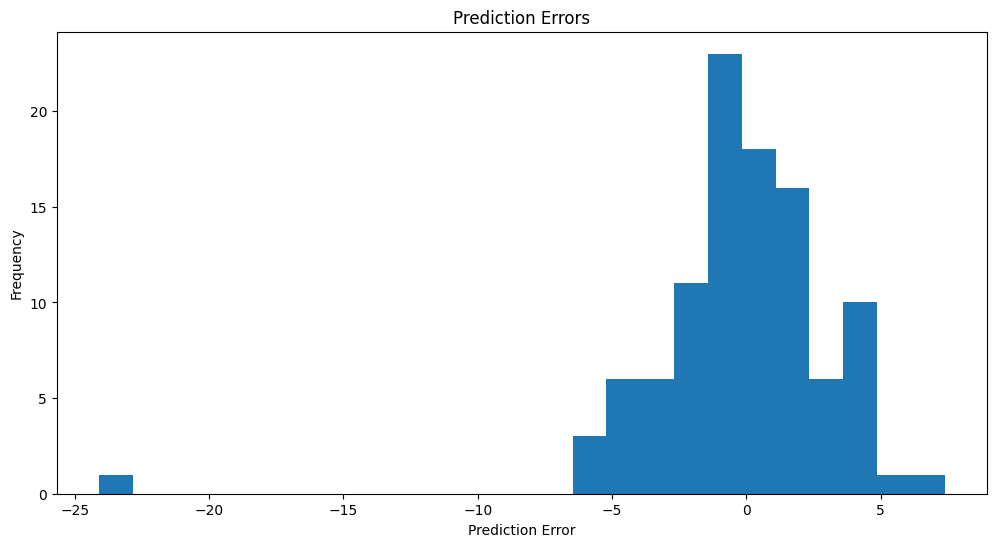

In [10]:
import matplotlib.pyplot as plt

# История обучения
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Progress During Training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Сравнение предсказаний и истинных значений
predicted_values = model.predict(X_test_scaled)
plt.figure(figsize=(12, 6))
plt.scatter(y_test, predicted_values, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

# График ошибок
errors = predicted_values.flatten() - y_test
plt.figure(figsize=(12, 6))
plt.hist(errors, bins=25)
plt.title('Prediction Errors')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.show()
